In [41]:
import librosa
import pyaudio
import wave
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import scipy
import numpy as np

In [26]:
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 12
WAVE_OUTPUT_FILENAME = "file.wav"
DEVICE = 2 #MICROFONO WEBCAM EN W11
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True, input_device_index =DEVICE,
                frames_per_buffer=CHUNK)
print("recording...")
frames = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print("finished recording")
 
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

recording...
finished recording


In [47]:
audio_data = 'file.wav'
x , sr = librosa.load(audio_data)
y , sr = librosa.load(audio_data) #revisar y
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050


<class 'numpy.ndarray'> <class 'int'>


In [20]:
librosa.load(audio_data, sr=44100)

(array([ 0.0000000e+00,  0.0000000e+00, -3.0517578e-05, ...,
        -1.4343262e-03, -1.4038086e-03, -1.4038086e-03], dtype=float32),
 44100)

In [4]:
ipd.Audio(audio_data) # run in JupyterNotebook web, not in VS Code but the file is OK

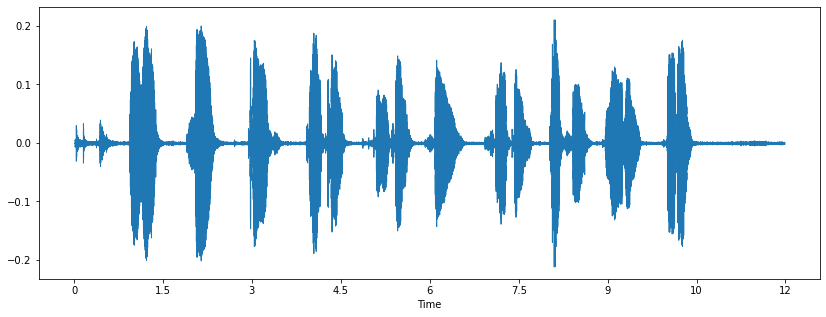

In [10]:
%matplotlib inline

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)#muestra a 22KHZ mono

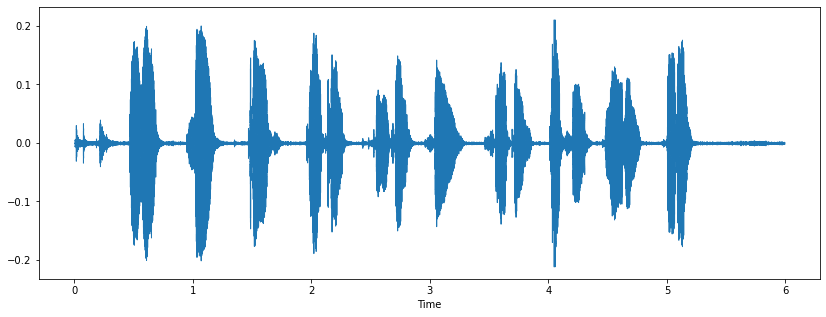

In [11]:
%matplotlib inline

plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=44100)#muestra a 44.1KHz

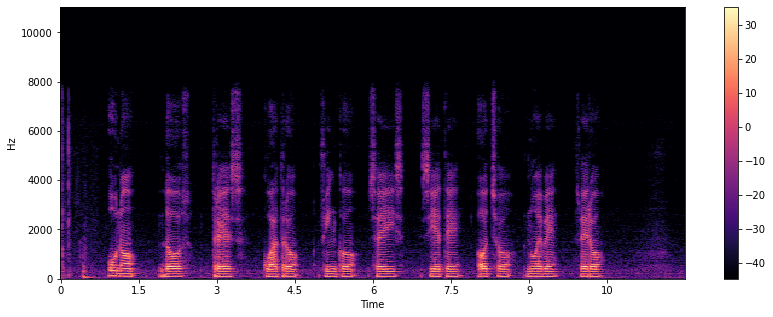

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

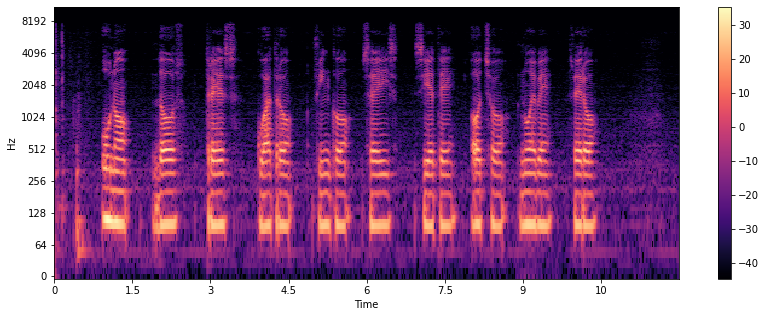

In [8]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Extracción de características 

### Mel-Frequency Cepstral Coefficient (MFCC)

In [30]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

(20, 517)


C:\Users\Victor\AppData\Local\Temp/ipykernel_5352/205689933.py:1: FutureWarning: Pass y=[-9.6154004e-08 -1.5651818e-05  1.6246360e-06 ... -1.4383865e-03
 -1.4341407e-03 -1.4818257e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


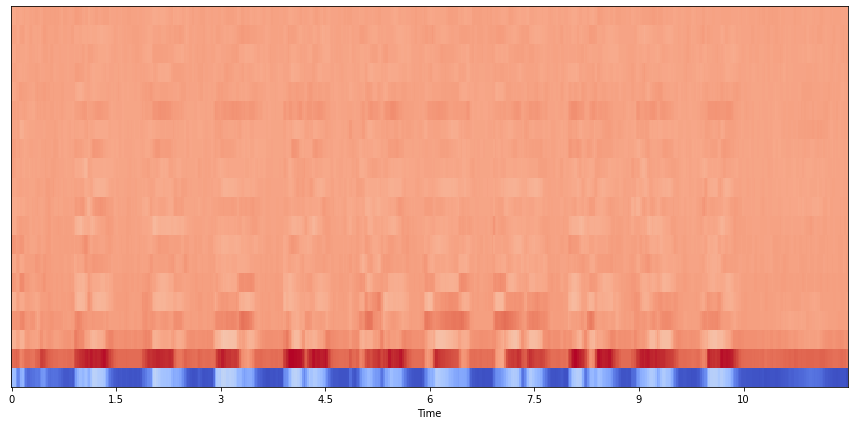

In [31]:
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

### Linear Prediction Coefficients

Text(0.5, 1.0, 'LP Model Forward Prediction')

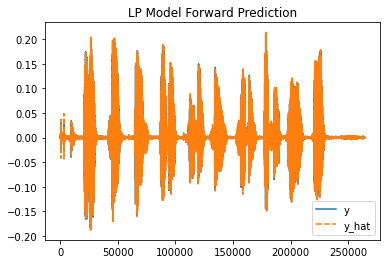

In [56]:
a = librosa.lpc(y, order=2)
b = np.hstack([[0], -1 * a[1:]])
y_hat = scipy.signal.lfilter(b, [1], y)
fig, ax = plt.subplots()
ax.plot(y)
ax.plot(y_hat, linestyle='--')
ax.legend(['y', 'y_hat'])
ax.set_title('LP Model Forward Prediction')

### Chroma feature

In [32]:
chromagram = librosa.feature.chroma_stft(x, sr=sr)
print(chromagram)

[[0.60335684 0.49882057 0.3755287  ... 0.34545812 0.5459179  0.742004  ]
 [0.66941684 0.41751695 0.25290608 ... 0.9097535  0.98169    0.6800977 ]
 [0.8355614  0.81477624 0.6951257  ... 1.         0.7653076  0.46677586]
 ...
 [0.27496818 0.13196383 0.12839101 ... 0.7999047  0.73948383 0.6251996 ]
 [0.41858897 0.36765653 0.35774946 ... 0.37042844 0.72503906 0.77615035]
 [0.5100863  0.5399842  0.5000991  ... 0.3620945  0.5117844  0.77252555]]


C:\Users\Victor\AppData\Local\Temp/ipykernel_5352/2567734643.py:1: FutureWarning: Pass y=[-9.6154004e-08 -1.5651818e-05  1.6246360e-06 ... -1.4383865e-03
 -1.4341407e-03 -1.4818257e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(x, sr=sr)


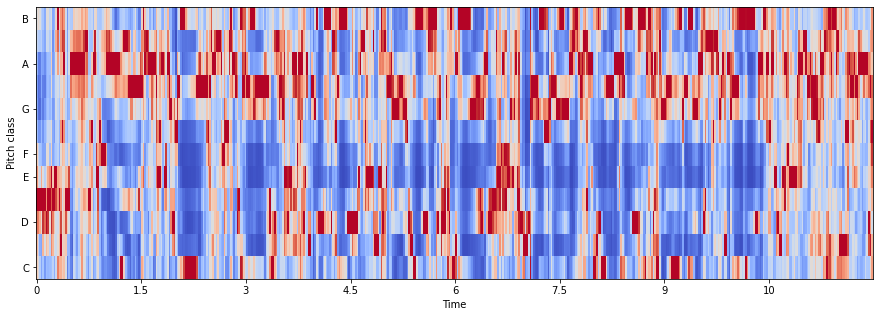

In [33]:
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', cmap='coolwarm')

### RMS root-mean-square

In [48]:
librosa.feature.rms(y=y)

array([[0.00418967, 0.00460304, 0.00477268, 0.00469764, 0.00265403,
        0.00367212, 0.00381873, 0.0038061 , 0.00378197, 0.00214219,
        0.00146401, 0.00116501, 0.0010229 , 0.00096269, 0.0011098 ,
        0.00117613, 0.00128074, 0.00643885, 0.00899485, 0.01094375,
        0.01158   , 0.01005122, 0.00851775, 0.00596398, 0.00475732,
        0.00407817, 0.00238157, 0.00197304, 0.00159557, 0.00137667,
        0.0012622 , 0.00112096, 0.00097066, 0.00086005, 0.00088478,
        0.00091977, 0.00092184, 0.0009491 , 0.00108299, 0.0169339 ,
        0.03354794, 0.054911  , 0.07237709, 0.0848508 , 0.09139632,
        0.08860242, 0.08177357, 0.07266378, 0.06289516, 0.06230504,
        0.06587695, 0.07127436, 0.0746586 , 0.07201149, 0.06786475,
        0.06040042, 0.05414096, 0.04628862, 0.03519058, 0.02502693,
        0.01357193, 0.0070335 , 0.00402955, 0.00237219, 0.00165689,
        0.00116081, 0.00098267, 0.00099595, 0.00100585, 0.0012014 ,
        0.00133616, 0.00128778, 0.00127851, 0.00

[Text(0.5, 1.0, 'log Power spectrogram')]

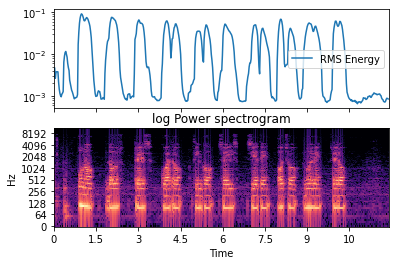

In [54]:
rms = librosa.feature.rms(S=S)
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')

In [55]:
S = librosa.magphase(librosa.stft(y, window=np.ones, center=False))[0]
librosa.feature.rms(S=S)
plt.show()

## Essentia

https://essentia.upf.edu/installing.html
Building Essentia on Windows
Essentia C++ library and extractors based on it can be compiled and run correctly on Windows, but Python bindings are not supported yet. The easiest way to build Essentia is by cross-compilation on Linux using MinGW. However the resulting library binaries are only compatible within C++ projects using MinGW compilers, and therefore they are not compatible with Visual Studio. If you want to use Visual Studio, there is no project readily available, so you will have to setup one yourself and compile the dependencies too.

In [37]:
import essentia
import essentia.standard

ModuleNotFoundError: No module named 'essentia'